## Setup

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.backend import clear_session
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm
import shutil
from zipfile import ZipFile


## Mount Gdrive

In [ ]:
from google.colab import drive
drive.mount._DEBUG = True
drive.mount('/content/gdrive', force_remount=True)

unset HISTFILE; export PS1="root@201317b60734-9e8cd83352244ad7890af4d5a461b492: "
bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
/content# root@201317b60734-9e8cd83352244ad7890af4d5a461b492: umount -f /content/gdrive || umount /content/gdrive; pkill -9 -x drive
umount: /content/gdrive: no mount point specified.
umount: /content/gdrive: no mount point specified.
root@201317b60734-9e8cd83352244ad7890af4d5a461b492: pkill -9 -f /opt/google/drive/directoryprefetcher_binary
root@201317b60734-9e8cd83352244ad7890af4d5a461b492: ( while `sleep 0.5`; do if [[ -d "/content/gdrive" && "$(ls -A /content/gdrive)" != "" ]]; then echo "google.colab.drive MOUNTED"; break; fi; done ) &
[1] 116
root@201317b60734-9e8cd83352244ad7890af4d5a461b492: cat /tmp/tmp0pqh64hw/drive.fifo | head -1 | ( /opt/google/drive/drive --features=fuse_max_background:1000,max_read_qps:1000,max_write_qps:1000,max_operation_batch_size:15,max_parallel_push_task_insta

## Prepare CelebA data
We'll use face images from the CelebA dataset, resized to 64x64.

In [ ]:
if 'datas' not in os.listdir():
    os.makedirs("datas")

## downlod data from web site
!gsutil cp gs://cartoonset_public_files/cartoonset10k.tgz /content/datas/cartoonset10k.tgz


Copying gs://cartoonset_public_files/cartoonset10k.tgz...
/ [1 files][454.6 MiB/454.6 MiB]                                                
Operation completed over 1 objects/454.6 MiB.                                    


In [ ]:

## dezip on the tmp dir
!tar -xzvf "/content/datas/cartoonset10k.tgz" -C "/content/datas/"


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
cartoonset10k/cs11130198548099864740.csv
cartoonset10k/cs11130198548099864740.png
cartoonset10k/cs11130522928710913906.csv
cartoonset10k/cs11130522928710913906.png
cartoonset10k/cs11130692035407747496.csv
cartoonset10k/cs11130692035407747496.png
cartoonset10k/cs1113080672465802980.csv
cartoonset10k/cs1113080672465802980.png
cartoonset10k/cs11131138722323947780.csv
cartoonset10k/cs11131138722323947780.png
cartoonset10k/cs1113121412202668922.csv
cartoonset10k/cs1113121412202668922.png
cartoonset10k/cs11131333133753359573.csv
cartoonset10k/cs11131333133753359573.png
cartoonset10k/cs1113143340294813643.csv
cartoonset10k/cs1113143340294813643.png
cartoonset10k/cs11131732994961040179.csv
cartoonset10k/cs11131732994961040179.png
cartoonset10k/cs1113191746674328122.csv
cartoonset10k/cs1113191746674328122.png
cartoonset10k/cs11131958805482037869.csv
cartoonset10k/cs11131958805482037869.png
cartoonset10k/cs111326682978

In [ ]:
if 'cartoonset10k.tgz' in os.listdir('/content/datas'):
    os.remove('/content/datas/cartoonset10k.tgz')

os.rename('/content/datas/cartoonset10k', '/content/datas/cartoonset')

In [ ]:
if 'csv' not in os.listdir('/content/datas/'):
    os.makedirs("/content/datas/csv")
if 'cartoons_img' not in os.listdir('/content/datas/'):
    !mkdir datas/cartoons_img
    !mkdir datas/cartoons_img/img

In [ ]:

## move csv in to a subdir
i=0
for file in os.listdir("/content/datas/cartoonset"):
    if file[-3:]!='png':
        shutil.move('/content/datas/cartoonset/' + file, 
                    '/content/datas/csv/' + file)
    if file[-3:]=='png':
        # i+=1
        # new_name=str('img' +'{0:05}'.format(i)+'.png')
        # os.rename(os.path.join('/content/datas/cartoonset', file), os.path.join('/content/datas/cartoonset', new_name))
        # shutil.move('/content/datas/cartoonset/' + new_name, 
        #             '/content/datas/cartoonset/img/' + new_name)
        shutil.copyfile('/content/datas/cartoonset' + '/'+ file, 
                    '/content/datas/cartoons_img/img' + '/' + file)



In [ ]:
for file in os.listdir("/content/datas/cartoons_img/img"):
    print(file)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
cs10314068739754438014.png
cs10301840937838674179.png
cs10935246756702053026.png
cs10953415440882683988.png
cs11157267954282814274.png
cs10021353860308526358.png
cs11410738137183428275.png
cs10611203210795514438.png
cs10446452728940980068.png
cs10711633919389792216.png
cs10851599513318118717.png
cs10947775226942376811.png
cs10185813027001709912.png
cs10715302815744569050.png
cs10376817127795783010.png
cs11375974499839185882.png
cs11256176016483175077.png
cs10873629105169157866.png
cs10599799053013927704.png
cs10091977331869469416.png
cs10098344640900953060.png
cs11370651996261376785.png
cs10092263534170136987.png
cs11484153065716911216.png
cs11151346809426742050.png
cs11464521413365432860.png
cs10049824596350475671.png
cs10270353372314346952.png
cs10643193297858739522.png
cs110526296514948366.png
cs10312154828725390156.png
cs10721065642135573907.png
cs10476981637784136924.png
cs11490154093081112909.png
cs1038

In [ ]:
import shutil
output_filename = '/content/datas/cartoon_img/cartoon_img'
dir_name = "/content/datas/cartoons_img/img"
shutil.make_archive(output_filename, 'zip', dir_name)

'/content/datas/cartoon_img/cartoon_img.zip'

*Create a dataset from our folder, and rescale the images to the [0-1] range:

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 128
src = "/content/datas/cartoons_img"

In [ ]:
dataset = keras.preprocessing.image_dataset_from_directory(directory=src, 
                                                           label_mode=None, 
                                                           seed=123,
                                                           image_size=(IMG_SIZE, IMG_SIZE), 
                                                           batch_size=BATCH_SIZE,
                                                           )
dataset = dataset.map(lambda x: x / 255.0)


Found 10000 files belonging to 1 classes.


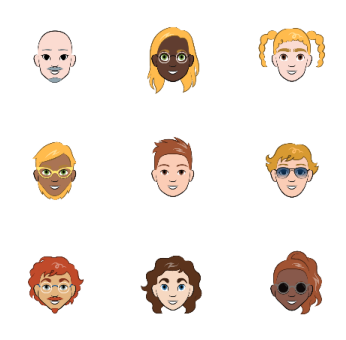

In [ ]:
plt.figure(figsize=[6,6])
i=0
for x in dataset:
    if i==9:
        break
    ax = plt.subplot(3, 3, i+1)
    plt.imshow((x.numpy() * 255).astype("int32")[0])
    plt.axis("off")
    i+=1



## Create the discriminator

It maps a 128*128 image to a binary classification score.

In [ ]:
clear_session()

discriminator = keras.Sequential(
    [
        keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)
discriminator.summary()


Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        3136      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       131200    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       262272    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)           

## Create the generator

It mirrors the discriminator, replacing Conv2D layers with Conv2DTranspose layers.

In [ ]:
latent_dim = 128
Dim_first_lay = int(IMG_SIZE/(2**3))
generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(Dim_first_lay * Dim_first_lay * 128),
        layers.Reshape((Dim_first_lay, Dim_first_lay, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="tanh"),
    ],
    name="generator",
)
generator.summary()


Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32768)             4227072   
_________________________________________________________________
reshape (Reshape)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 128)       262272    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 64, 64, 256)       524544    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 64, 64, 256)       0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 128, 128, 512)     20

## Override train_step

In [ ]:

class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Decode them to fake images
        generated_images = self.generator(random_latent_vectors)

        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
            )

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(
            zip(grads, self.generator.trainable_weights)
            )

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }


## Create a callback that periodically saves generated images

In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        self.model.generator.save('/content/gdrive/MyDrive/Formation simplon/Brief_Avatar_generator/generator.h5')
        self.model.discriminator.save('/content/gdrive/MyDrive/Formation simplon/Brief_Avatar_generator/discriminator.h5')
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = keras.preprocessing.image.array_to_img(generated_images[i])
            img.save("/content/gdrive/MyDrive/Formation simplon/Brief_Avatar_generator/Image_Generate/generated_img_%03d_%d.png" % (epoch, i))
        


## Train the end-to-end model

image 64 -> 250 s for each epoch -> 6,5 h for 100 epochs

image 128 -> 334 s for each epoch -> 9h for 100 epochs

**with 3 images save par epoch** : 
image 128 -> 180 s for each epoch -> 5h for 100 epochs

In [ ]:
epochs = 100  # In practice, use ~100 epochs

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

In [ ]:
history = gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=3, latent_dim=latent_dim)]
)


Epoch 1/100
313/313 [==============================] - 177s 563ms/step - d_loss: 0.1297 - g_loss: 3.4990
Epoch 2/100
313/313 [==============================] - 178s 565ms/step - d_loss: 0.1430 - g_loss: 3.5537
Epoch 3/100
313/313 [==============================] - 177s 562ms/step - d_loss: 0.1289 - g_loss: 3.6292
Epoch 4/100
313/313 [==============================] - 177s 562ms/step - d_loss: 0.1529 - g_loss: 3.6080
Epoch 5/100
313/313 [==============================] - 177s 563ms/step - d_loss: 0.1354 - g_loss: 3.5303
Epoch 6/100
313/313 [==============================] - 178s 564ms/step - d_loss: 0.1504 - g_loss: 3.6303
Epoch 7/100
313/313 [==============================] - 178s 564ms/step - d_loss: 0.1502 - g_loss: 3.6359
Epoch 8/100
313/313 [==============================] - 178s 564ms/step - d_loss: 0.1481 - g_loss: 3.5556
Epoch 9/100
313/313 [==============================] - 178s 565ms/step - d_loss: 0.1276 - g_loss: 3.6362
Epoch 10/100
313/313 [==============================] -

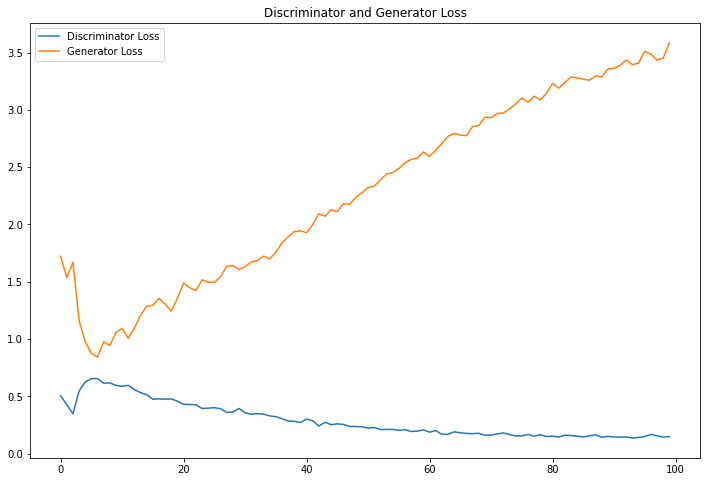

In [ ]:
d_loss = history.history['d_loss']
g_loss = history.history['g_loss']

epochs_range = range(epochs)

fig = plt.figure(figsize=[12, 8])
plt.plot(epochs_range, d_loss, label='Discriminator Loss')
plt.plot(epochs_range, g_loss, label='Generator Loss')
plt.legend(loc='upper left')
plt.title('Discriminator and Generator Loss')
plt.show()

In [ ]:
plt.savefig('/content/gdrive/MyDrive/Formation simplon/Brief_Avatar_generator/losses_fcn_of_epohchs0_100.png')

In [ ]:
d_loss = history.history['d_loss']
g_loss = history.history['g_loss']

epochs_range = range(epochs)

fig = plt.figure(figsize=[12, 8])
plt.plot(epochs_range, d_loss, label='Discriminator Loss')
plt.plot(epochs_range, g_loss, label='Generator Loss')
plt.legend(loc='upper left')
plt.title('Discriminator and Generator Loss')
plt.savefig('/content/gdrive/MyDrive/Formation simplon/Brief_Avatar_generator/losses_fcn_of_epohchs100_200.png')
plt.show()